In [40]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
df = pd.read_csv('etherprice.csv')

df.head(5)

,unix,date,y
0,1438214400,07/30/15,0.0
1,1438300800,07/31/15,0.0
2,1438387200,08/01/15,0.0
3,1438473600,08/02/15,0.0
4,1438560000,08/03/15,0.0


In [42]:
df.dtypes

unix      int64
date     object
y       float64
dtype: object

In [43]:
df['date'] = pd.DatetimeIndex(df['date'])
df.dtypes

unix             int64
date    datetime64[ns]
y              float64
dtype: object

In [44]:
df = df.rename(columns={'date': 'ds'})

df.head(5)

,unix,ds,y
0,1438214400,2015-07-30,0.0
1,1438300800,2015-07-31,0.0
2,1438387200,2015-08-01,0.0
3,1438473600,2015-08-02,0.0
4,1438560000,2015-08-03,0.0


In [45]:
df1 = df[['ds','y']]

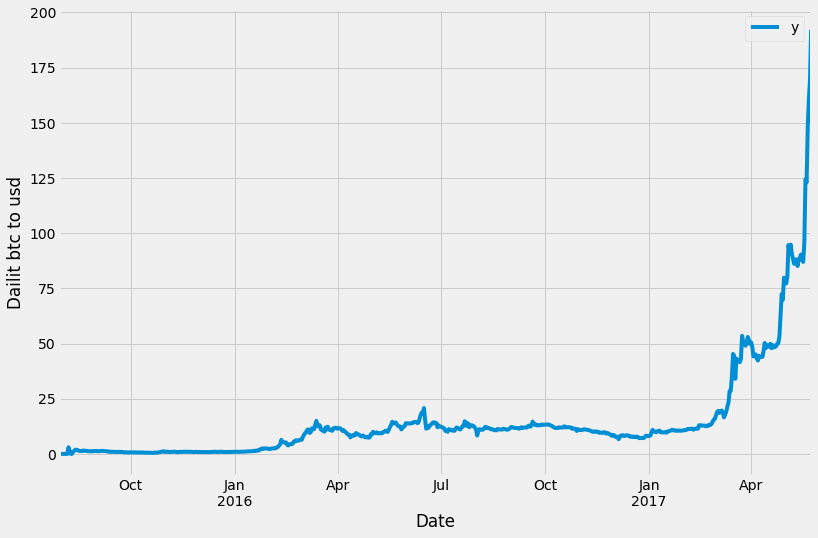

In [46]:
ax = df1.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Dailit btc to usd')
ax.set_xlabel('Date')

plt.show()

In [47]:
my_model = Prophet(interval_width=0.95)

In [48]:
my_model.fit(df1)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [49]:
future_dates = my_model.make_future_dataframe(periods=365, freq='D')
future_dates.tail()

,ds
1025,2018-05-20
1026,2018-05-21
1027,2018-05-22
1028,2018-05-23
1029,2018-05-24


In [50]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1025,2018-05-20,336.422708,245.617957,423.212613
1026,2018-05-21,337.082708,248.878019,429.104239
1027,2018-05-22,337.748211,252.418622,424.724329
1028,2018-05-23,338.824096,252.743497,424.321794
1029,2018-05-24,338.870267,248.765302,428.184097


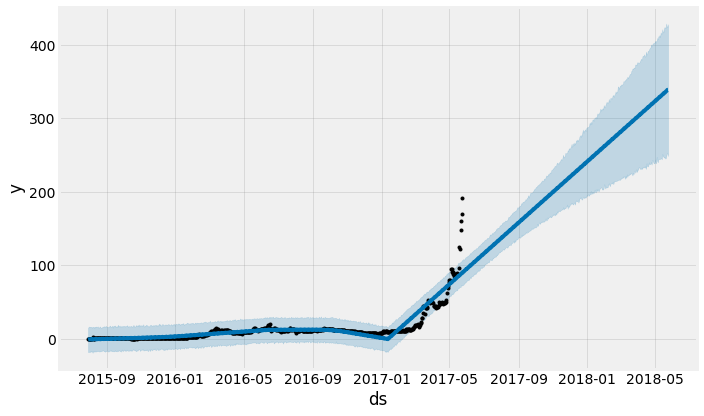

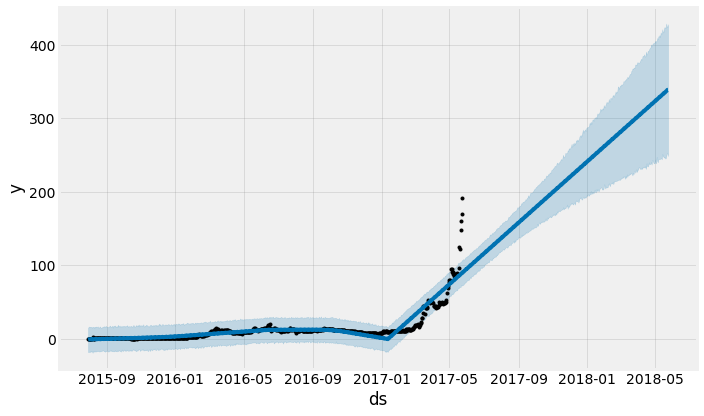

In [51]:
my_model.plot(forecast,
              uncertainty=True)

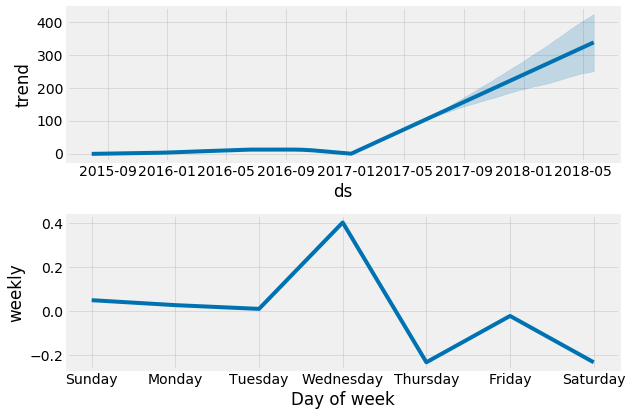

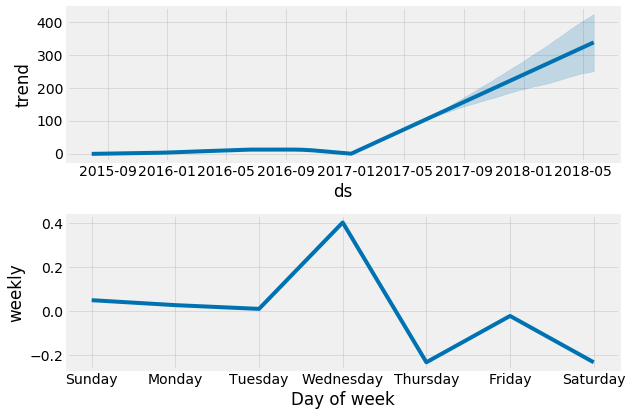

In [52]:
my_model.plot_components(forecast)